In [31]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('Data/inkoop.csv')

df['Datum'] = pd.to_datetime(df['Datum'], dayfirst=True)
df['Totaal gespendeerd'] = df['Totaal gespendeerd'].apply(lambda x: f"€ {x:,.2f}")
df['Jaar'] = df['Datum'].dt.year # eigen gemaakte kolom staat niet in de CSV! 

In [33]:
df.iloc[0]
#df.dtypes()

#                                       1
Company                               USA
Leverancier                   PaperSupply
Orders totaal                          23
Totaal gespendeerd             € 9,287.00
Datum                 2023-04-10 00:00:00
Jaar                                 2023
Name: 0, dtype: object

In [34]:
df['Totaal gespendeerd'] = df['Totaal gespendeerd'].replace({'€': '', ',': ''}, regex=True).astype(float)
df.iloc[0]

#                                       1
Company                               USA
Leverancier                   PaperSupply
Orders totaal                          23
Totaal gespendeerd                 9287.0
Datum                 2023-04-10 00:00:00
Jaar                                 2023
Name: 0, dtype: object

In [35]:
tb = df.groupby('Company')['Totaal gespendeerd'].sum().reset_index()
tb['Totaal gespendeerd'] = tb['Totaal gespendeerd'].apply(lambda x: f"€ {x:,.2f}")
tb

,Company,Totaal gespendeerd
0,België N.V.,"€ 1,593,358.00"
1,DE GMBH,"€ 1,450,935.00"
2,Nederland B.V.,"€ 1,856,229.00"
3,UK B.V.,"€ 1,602,150.00"
4,USA,"€ 1,767,741.00"


In [36]:
tb['Totaal gespendeerd'] = tb['Totaal gespendeerd'].replace({'€': '', ',': ''}, regex=True).astype(float)
tb

,Company,Totaal gespendeerd
0,België N.V.,1593358.0
1,DE GMBH,1450935.0
2,Nederland B.V.,1856229.0
3,UK B.V.,1602150.0
4,USA,1767741.0


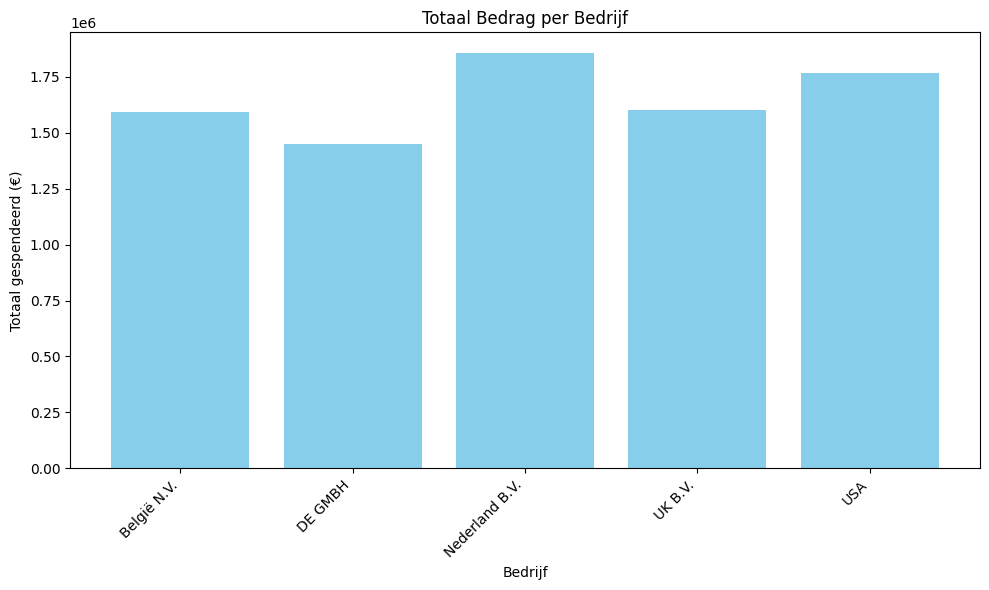

In [37]:
plt.figure(figsize=(10,6))
plt.bar(tb['Company'], tb['Totaal gespendeerd'], color='skyblue')
plt.title('Totaal Bedrag per Bedrijf')
plt.xlabel('Bedrijf')
plt.ylabel('Totaal gespendeerd (€)')
plt.xticks(rotation=45, ha='right')  # Draai de labels voor de bedrijven
plt.tight_layout()  # Zorg dat de labels goed passen
plt.show()

In [ ]:
import seaborn as sns

# Maak een barplot van de gegevens
plt.figure(figsize=(10,6))
sns.barplot(x='Company', y='Totaal gespendeerd', data=tb, palette='Blues_d')
plt.title('Totaal Bedrag per Bedrijf')
plt.xlabel('Bedrijf')
plt.ylabel('Totaal gespendeerd (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
tbd = df.groupby(['Company', 'Jaar'])['Totaal gespendeerd'].sum().reset_index()
tbd

,Company,Jaar,Totaal gespendeerd
0,België N.V.,2023,791619.0
1,België N.V.,2024,801739.0
2,DE GMBH,2023,757727.0
3,DE GMBH,2024,693208.0
4,Nederland B.V.,2023,972429.0
5,Nederland B.V.,2024,883800.0
6,UK B.V.,2023,733846.0
7,UK B.V.,2024,868304.0
8,USA,2023,859494.0
9,USA,2024,908247.0


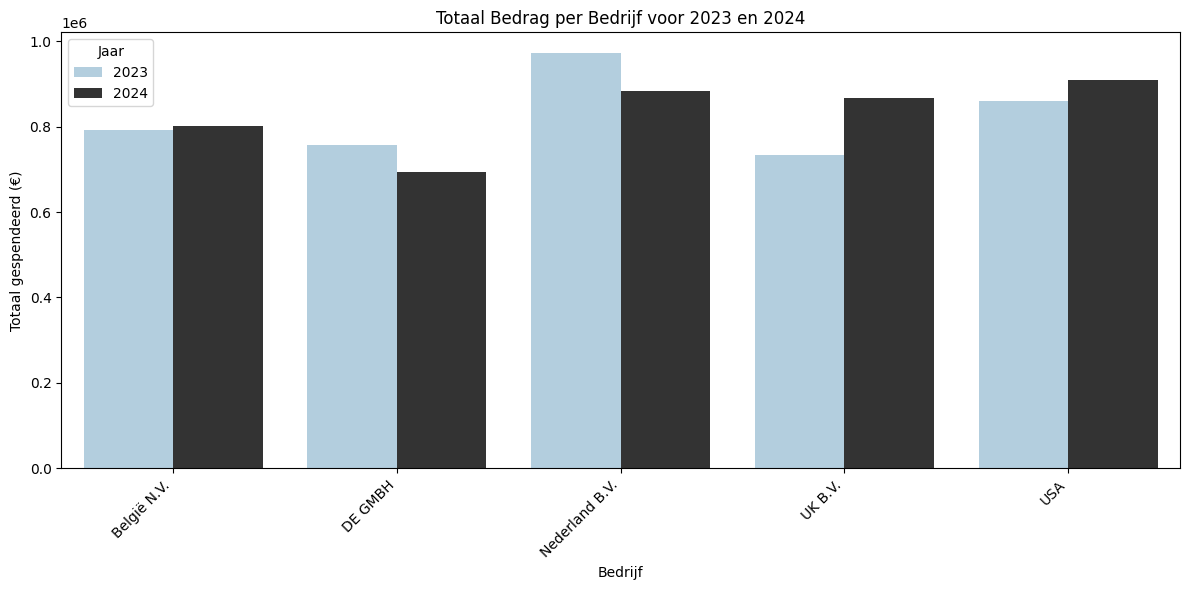

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Totaal gespendeerd', hue='Jaar', data=tbd, palette='Blues_d')

# Titel en labels toevoegen
plt.title('Totaal Bedrag per Bedrijf voor 2023 en 2024')
plt.xlabel('Bedrijf')
plt.ylabel('Totaal gespendeerd (€)')
plt.xticks(rotation=45, ha='right')  # Draai de labels voor de bedrijven
plt.tight_layout()  # Zorg dat de labels goed passen
plt.show()